# Decision tree   
* Classification and Regression
* No feature scaling because not dependent on distance
* Automatic handle missing values

* No effect of outliers- Because not diatnce based

* Handle overfit- Decision tree pruning (Bias variance)

* Decision tree regressor

* Visualize 



In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [2]:
df=pd.read_csv('F:/GitHub/Machine-Learning/Decision Tree/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
X=df.drop('quality',axis=1)
y=df['quality']

In [4]:
#separate test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state = 123)
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((1119, 11), (480, 11))

In [5]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [6]:
y_pred=clf.predict(X_test)

In [7]:
#confusion matrix for test
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print (confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[  0   0   2   0   0   0]
 [  2   4   6   3   1   0]
 [  2  12 126  59  15   0]
 [  0   9  48 106  21   1]
 [  0   1   2  20  30   5]
 [  0   0   0   1   3   1]]
0.55625


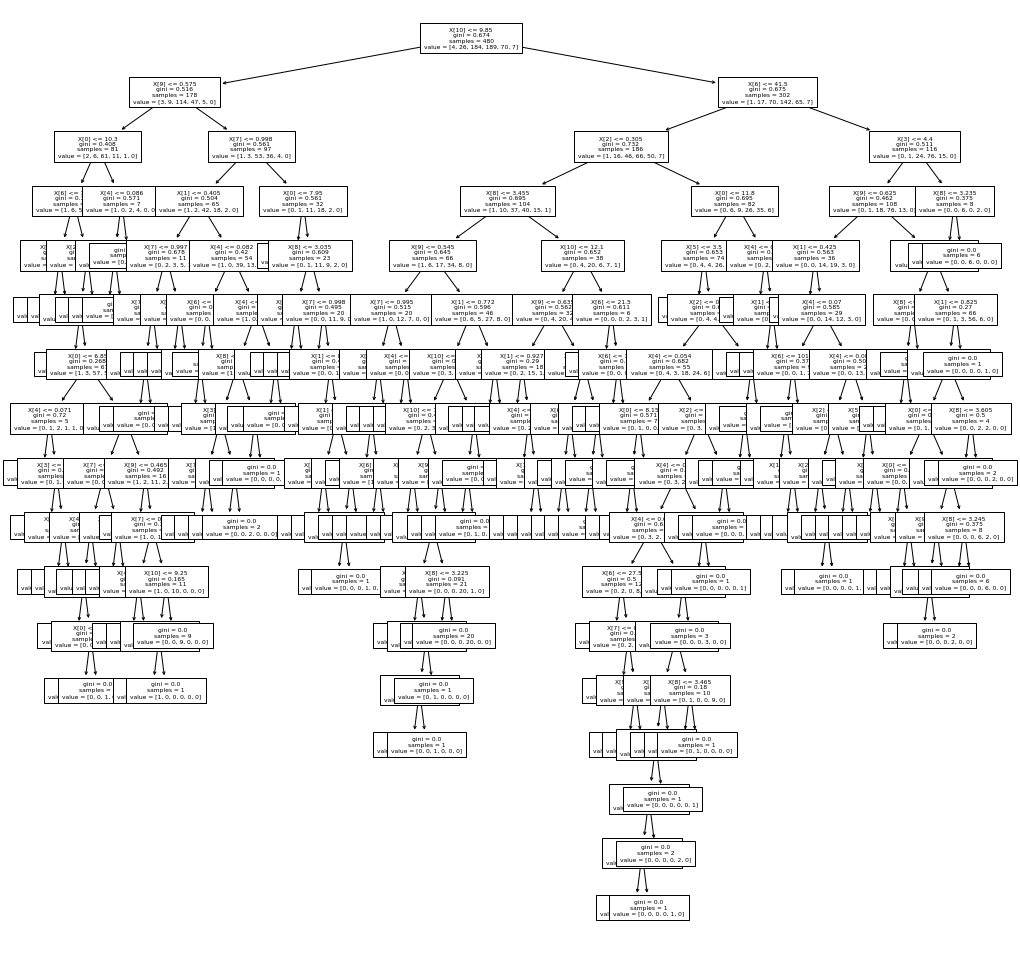

In [8]:
#visualize
fig, ax = plt.subplots(figsize=(17, 17))
tree.plot_tree(clf.fit(X_test, y_pred),fontsize=6)
plt.show()

In [9]:
print(tree.export_text(clf))

|--- feature_10 <= 9.85
|   |--- feature_9 <= 0.57
|   |   |--- feature_0 <= 10.30
|   |   |   |--- feature_6 <= 16.50
|   |   |   |   |--- feature_4 <= 0.08
|   |   |   |   |   |--- class: 5
|   |   |   |   |--- feature_4 >  0.08
|   |   |   |   |   |--- class: 4
|   |   |   |--- feature_6 >  16.50
|   |   |   |   |--- feature_2 <= 0.59
|   |   |   |   |   |--- feature_1 <= 0.30
|   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |--- feature_1 >  0.30
|   |   |   |   |   |   |--- feature_0 <= 6.85
|   |   |   |   |   |   |   |--- feature_4 <= 0.07
|   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |   |--- feature_4 >  0.07
|   |   |   |   |   |   |   |   |--- feature_3 <= 1.95
|   |   |   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |   |   |   |--- feature_3 >  1.95
|   |   |   |   |   |   |   |   |   |--- feature_8 <= 3.31
|   |   |   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |   |   |   |--- feature_8 >  3.31
|   |   |

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn import tree

X, y = load_iris(return_X_y=True)

#visualize for smaller dataset
#Code here
fig, ax = plt.subplots(figsize=(15, 15))
tree.plot_tree(clf.fit(X, y),fontsize=12)
plt.show()

print(tree.export_text(clf))

### Decision Tree Pruning

#### Cost Complexity Pruning (CCP)
Cutting the leaves from tree

Lower ccp_alpha results in more number of nodes. But the overall impurity of the model will not change much. So we can go with larger values of ccp_alpha.

In [10]:
path=clf.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas,impurities= path.ccp_alphas, path.impurities
alphas=path['ccp_alphas']

In [11]:
accuracy_train, accuracy_test= [],[]

for i in alphas:
    clf = tree.DecisionTreeClassifier(ccp_alpha=i)
    clf = clf.fit(X_train,y_train)
    
    y_train_pred=clf.predict(X_train)
    y_test_pred=clf.predict(X_test)
    
    accuracy_train.append(accuracy_score(y_train,y_train_pred))
    accuracy_test.append(accuracy_score(y_test,y_test_pred))

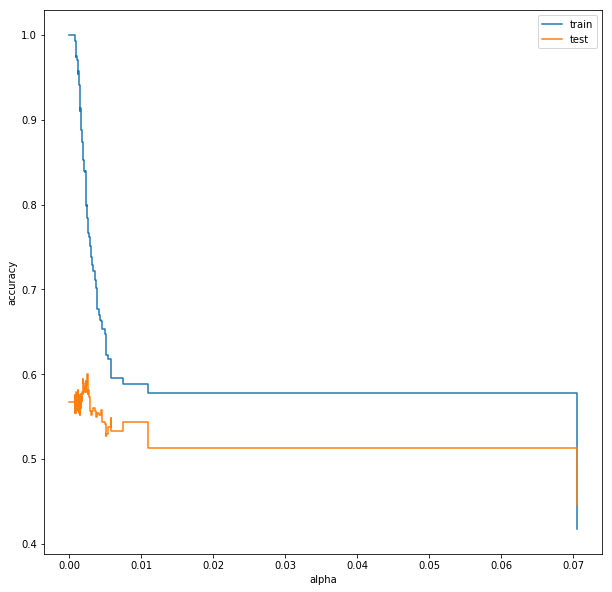

In [12]:

fig, ax = plt.subplots()
fig.set_size_inches(10,10)
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.plot(ccp_alphas, accuracy_train, label="train",drawstyle="steps-post")
ax.plot(ccp_alphas, accuracy_test, label="test",drawstyle="steps-post")
ax.legend()
plt.show()

In [21]:
clf=tree.DecisionTreeClassifier(ccp_alpha=0.0009)
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.5770833333333333
